## Run data pipeline
Returns an aggegrated df to work with

In [1]:
%reset -f

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Copy this cell to every new version of Main
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/processed/10_sec_processed/HECTORdataAggregated_20240613_1150.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df)}")

Number of rows in the file: 298723


In [4]:
import pandas as pd

# Assuming df is your DataFrame

# Count rows with NaN values
rows_with_nans = df.isna().any(axis=1).sum()

# Identify columns with NaN values
columns_with_nans = df.columns[df.isna().any()].tolist()

print(f'Number of rows with NaN values: {rows_with_nans}')
print(f'Columns with NaN values: {columns_with_nans}')

Number of rows with NaN values: 0
Columns with NaN values: []


In [5]:

df=df.dropna()

In [6]:
raise SystemExit("Stopping execution of  DF IMPORT AND DATA PREPARATION.")

SystemExit: Stopping execution of  DF IMPORT AND DATA PREPARATION.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


END OF DF IMPORT

#APPLY MODEL TO MAKE PREDITCITON BASED ON OPERATIONAL CHARACTERISTCS

In [9]:
df.columns

Index(['datetime', 'MotorJoules', 'ActualSpeed', 'NetWeight', 'DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower', 'FC1AirFlow',
       'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent', 'BattOutputPower',
       'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool', 'TotalDistance',
       'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt', 'BatMaxV',
       'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight', 'H2Press',
       'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday', 'H2Temp',
       'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday', 'Is_Monday',
       'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle', 'H2Perc',
       'SpeedChange'],
      dtype='object')

Train MAE: 461.26689035675406
Train MSE: 1878592.2771638494
Train RMSE: 1370.617480248902
Train R²: 0.9999892842806921
Test MAE: 509.63178339528804
Test MSE: 2265544.4616690762
Test RMSE: 1505.172568733923
Test R²: 0.9999870011842293


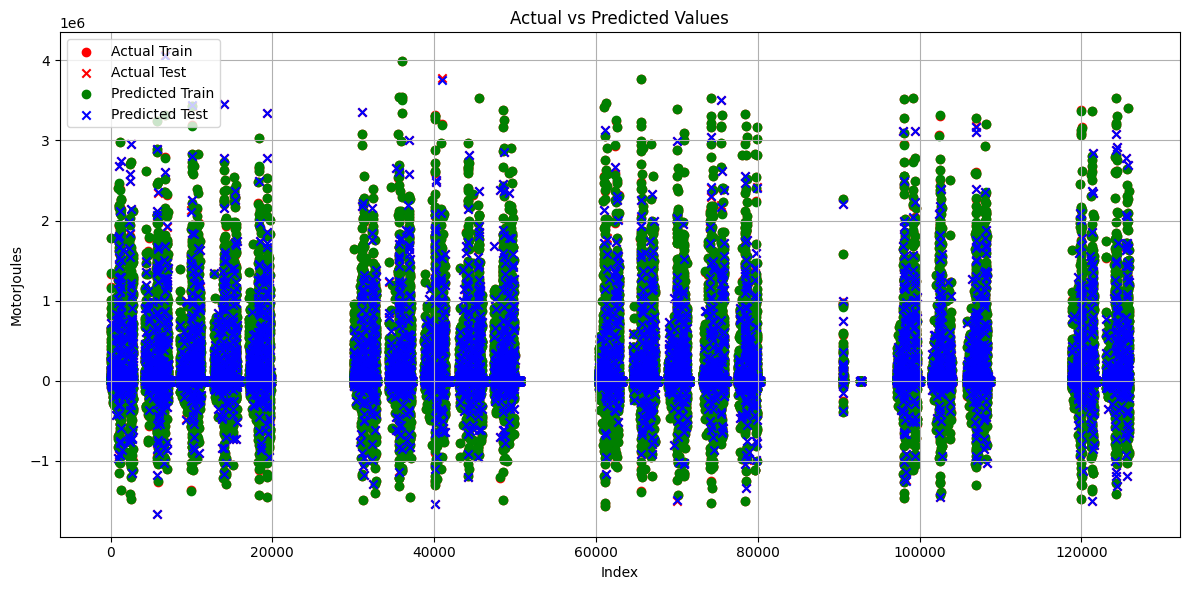

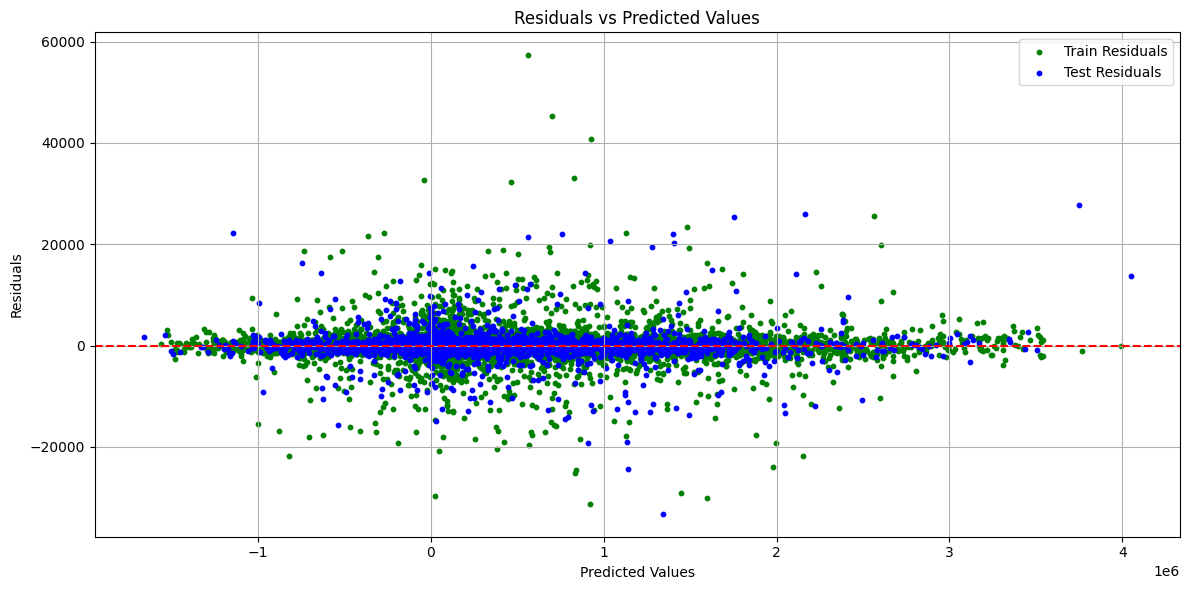

['poly_transformer.pkl']

In [20]:
#APPLY MODEL TO MAKE PREDITCITON BASED ON OPERATIONAL CHARACTERISTCS


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For loading models

# Assuming 'df' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Define a function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Specify the date range for filtering
start_date = '2022-08-01'
end_date = '2022-08-31'  # Adjust the end date as needed

# Filter the dataset based on the specified date range
filtered_df = filter_by_date(df, start_date, end_date)

# Define the target variable
target = 'MotorJoules'

# Use all columns except 'datetime' and 'target' as features
features = filtered_df.columns.drop(['datetime', target])

# Split data into features and target
X = filtered_df[features]
y = filtered_df[target]

# Use a smaller sample of data if the dataset is very large
# For example, use only 10% of the data or a fixed number of rows
# X, y = X.sample(frac=0.1, random_state=42), y.sample(frac=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce the polynomial degree to decrease complexity
degree = 2  # Change to 2 or even 1 (linear) to simplify
X_train_poly = generate_polynomial_features(X_train_scaled, degree)
X_test_poly = generate_polynomial_features(X_test_scaled, degree)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate performance measures
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')

# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))

# Actual values for Train and Test sets
plt.scatter(X_train.index, y_train, color='red', label='Actual Train', marker='o')
plt.scatter(X_test.index, y_test, color='red', label='Actual Test', marker='x')

# Predicted values for Train and Test sets
plt.scatter(X_train.index, y_train_pred, color='green', label='Predicted Train', marker='o')
plt.scatter(X_test.index, y_test_pred, color='blue', label='Predicted Test', marker='x')

plt.xlabel('Index')
plt.ylabel('MotorJoules')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot to check for patterns
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, color='green', s=10, label='Train Residuals')
plt.scatter(y_test_pred, y_test - y_test_pred, color='blue', s=10, label='Test Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save results to CSV
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}
df_results = pd.DataFrame(results)
df_results.to_csv('polynomial_model_performance.csv', index=False)


# Save the model, scaler, and polynomial transformer
joblib.dump(model, 'polynomial_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(PolynomialFeatures(degree=degree, include_bias=False), 'poly_transformer.pkl')


In [21]:
#APPLY MODEL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For saving and loading models

# Convert 'datetime' column to datetime type if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Define a function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Specify the date range for filtering
start_date = '2022-08-01'
end_date = '2022-09-01'  # Adjust the end date as needed

# Filter the dataset based on the specified date range
filtered_df = filter_by_date(df, start_date, end_date)

# Define the target variable
target = 'MotorJoules'

# Use all columns except 'datetime' and 'target' as features
features = filtered_df.columns.drop(['datetime', target])

# Split data into features and target
X = filtered_df[features]
y = filtered_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
degree = 2  # Change to 2 or even 1 (linear) to simplify
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)  # Fit and transform on training data

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_poly = poly.transform(X_test)  # Transform test data (without fitting again)
X_test_scaled = scaler.transform(X_test_poly)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save the model, scaler, and polynomial transformer
joblib.dump(model, 'polynomial_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly_transformer.pkl')  # Saving the fitted polynomial transformer

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance measures
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')


: 

In [ ]:
print(df.columns)

Index(['datetime', 'ActualSpeed', 'NetWeight', 'SpeedChange', 'StopOnOff',
       'ThrottlePerc', 'CompOnOff', 'FC2Current', 'FC3Current', 'MotorTemp',
       'FC1AirFlow', 'FC2AirFlow', 'FC1Cool', 'FC2Cool', 'TotalDistance',
       'CompPower', 'FC3Volt', 'FC2Volt', 'BatMinV', 'HVACDraw', 'H2Weight',
       'H2Press', 'BrakePerc', 'BatSOC', 'H2Temp', 'AirTemp', 'H2Perc',
       'MotorJoules'],
      dtype='object')


In [ ]:
df1=df

In [ ]:
#Load predicitve model and apply  new data
# 
import numpy as np
import pandas as pd
import joblib  # For loading models
from datetime import datetime

# Load the saved model, scaler, and polynomial transformer
model = joblib.load('polynomial_regression_model.pkl')
scaler = joblib.load('scaler.pkl')
poly_transformer = joblib.load('poly_transformer.pkl')

# Assuming 'df1' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Function to apply the model to filtered data
def apply_model_to_filtered_data(df, start_date, end_date):
    # Filter the dataset based on the specified date range
    filtered_df = filter_by_date(df, start_date, end_date)

    # Use all columns except 'datetime' and 'MotorJoules' as features
    features = ['ActualSpeed', 'NetWeight', 'SpeedChange', 'StopOnOff', 
                'ThrottlePerc', 'CompOnOff', 'FC2Current', 'FC3Current', 
                'MotorTemp', 'FC1AirFlow', 'FC2AirFlow', 'FC1Cool', 
                'FC2Cool', 'TotalDistance', 'CompPower', 'FC3Volt', 
                'FC2Volt', 'BatMinV', 'HVACDraw', 'H2Weight', 
                'H2Press', 'BrakePerc', 'BatSOC', 'H2Temp', 
                'AirTemp', 'H2Perc']

    # Drop the 'datetime' and 'MotorJoules' columns as they are not used for prediction
    new_data = filtered_df.drop(columns=['datetime', 'MotorJoules'])

    # Ensure the new data has the correct feature columns
    missing_features = set(features) - set(new_data.columns)
    if missing_features:
        raise ValueError(f"New data is missing the following required features: {missing_features}")

    # Reorder new_data columns to match the expected order
    new_data = new_data[features]

    # Generate polynomial features using the previously fitted polynomial transformer
    new_data_poly = poly_transformer.transform(new_data)  # Transform new data to polynomial features

    # Standardize the polynomial features using the previously fitted scaler
    new_data_scaled = scaler.transform(new_data_poly)  # Scale the polynomial features

    # Make predictions on the new data
    new_predictions = model.predict(new_data_scaled)

    return new_predictions

# Specify the date range for filtering
start_date = '2022-08-01'  # Change as needed
end_date = '2022-10-01'    # Change as needed

# Apply the model to the filtered data
predictions = apply_model_to_filtered_data(df1, start_date, end_date)

# Print the predictions
print("Predictions for new data from {} to {}:".format(start_date, end_date))
print(predictions)

# Optionally, add the predictions back to the filtered DataFrame for further analysis or visualization
filtered_df = filter_by_date(df1, start_date, end_date)
filtered_df['Predicted_MotorJoules'] = predictions

print(filtered_df[['datetime', 'Predicted_MotorJoules']].head())  # Print a sample of the results


Predictions for new data from 2022-08-01 to 2022-10-01:
[312755.95106197 382889.41545227 357177.61720598 ... 163922.38234188
 129386.07563377  14773.03817353]
                  datetime  Predicted_MotorJoules
22 2022-08-01 04:07:59.860          312755.951062
23 2022-08-01 04:08:09.900          382889.415452
24 2022-08-01 04:08:19.880          357177.617206
25 2022-08-01 04:08:29.870          504771.759781
26 2022-08-01 04:08:39.850          227431.309360


/tmp/ipykernel_269699/3513470217.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Predicted_MotorJoules'] = predictions


In [ ]:
#adjust features to measure effect
import numpy as np
import pandas as pd
import joblib  # For loading models
import matplotlib.pyplot as plt

# Load the saved model, scaler, and polynomial transformer
model = joblib.load('polynomial_regression_model.pkl')
scaler = joblib.load('scaler.pkl')
poly_transformer = joblib.load('poly_transformer.pkl')

# Assuming 'df1' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Function to apply the model to filtered data
def apply_model_to_filtered_data(df, start_date, end_date):
    # Filter the dataset based on the specified date range
    filtered_df = filter_by_date(df, start_date, end_date)

    # Use all columns except 'datetime' and 'MotorJoules' as features
    features = ['ActualSpeed', 'NetWeight', 'SpeedChange', 'StopOnOff', 
                'ThrottlePerc', 'CompOnOff', 'FC2Current', 'FC3Current', 
                'MotorTemp', 'FC1AirFlow', 'FC2AirFlow', 'FC1Cool', 
                'FC2Cool', 'TotalDistance', 'CompPower', 'FC3Volt', 
                'FC2Volt', 'BatMinV', 'HVACDraw', 'H2Weight', 
                'H2Press', 'BrakePerc', 'BatSOC', 'H2Temp', 
                'AirTemp', 'H2Perc']

    # Drop the 'datetime' and 'MotorJoules' columns as they are not used for prediction
    new_data = filtered_df.drop(columns=['datetime', 'MotorJoules'])

    # Ensure the new data has the correct feature columns
    missing_features = set(features) - set(new_data.columns)
    if missing_features:
        raise ValueError(f"New data is missing the following required features: {missing_features}")

    # Reorder new_data columns to match the expected order
    new_data = new_data[features]

    # Generate polynomial features using the previously fitted polynomial transformer
    new_data_poly = poly_transformer.transform(new_data)  # Transform new data to polynomial features

    # Standardize the polynomial features using the previously fitted scaler
    new_data_scaled = scaler.transform(new_data_poly)  # Scale the polynomial features

    # Make predictions on the new data
    new_predictions = model.predict(new_data_scaled)

    return new_predictions, new_data

# Function to adjust ActualSpeed by a percentage
def adjust_actual_speed(df, percentage):
    adjusted_df = df.copy()
    adjusted_df['ActualSpeed'] *= (1 + percentage / 100.0)
    return adjusted_df

# Specify the date range for filtering
start_date = '2022-08-01'  # Change as needed
end_date = '2022-10-01'    # Change as needed

# Apply the model to the original filtered data
original_predictions, original_data = apply_model_to_filtered_data(df1, start_date, end_date)

# Adjust ActualSpeed by a specified percentage (e.g., increase by 10%)
percentage_adjustment = 10  # Change this value as needed
adjusted_data = adjust_actual_speed(original_data, percentage_adjustment)

# Generate polynomial features and make predictions on the adjusted data
adjusted_data_poly = poly_transformer.transform(adjusted_data)
adjusted_data_scaled = scaler.transform(adjusted_data_poly)
adjusted_predictions = model.predict(adjusted_data_scaled)

# Sum the predictions for comparison
sum_original_predictions = np.sum(original_predictions)
sum_adjusted_predictions = np.sum(adjusted_predictions)

# Calculate the percentage difference
percentage_difference = ((adjusted_sum - original_sum) / original_sum) * 100

# Determine bar colors based on comparison
bar_colors = ['blue', 'green' if sum_adjusted_predictions < sum_original_predictions else 'red']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Predicted_MotorJoules', 'Predicted_MotorJoules_ActualSpeed'], 
        [sum_original_predictions, sum_adjusted_predictions], 
        color=bar_colors)
plt.xlabel('Prediction Type')
plt.ylabel('Sum of MotorJoules')
plt.title('Sum of Predicted MotorJoules: Original vs Adjusted ActualSpeed')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the sums for verification
print(f'Sum of Original Predictions: {sum_original_predictions}')
print(f'Sum of Adjusted Predictions: {sum_adjusted_predictions}')



NameError: name 'adjusted_sum' is not defined

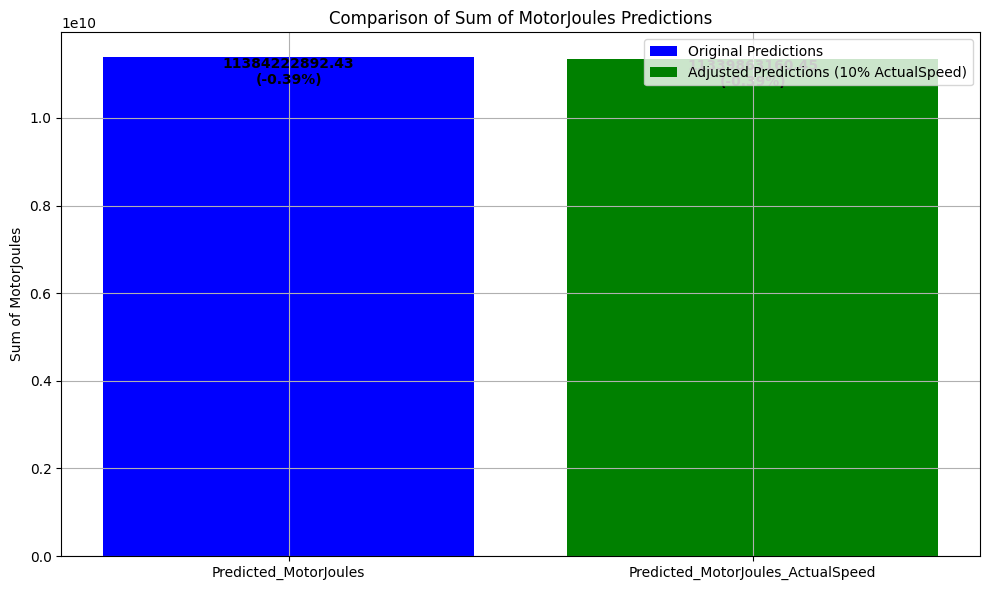

Original Sum of MotorJoules: 11384222892.43
Adjusted Sum of MotorJoules with 10% ActualSpeed: 11339863160.45
Percentage Difference: -0.39%


In [ ]:
import numpy as np
import pandas as pd
import joblib  # For loading models
import matplotlib.pyplot as plt

# Load the saved model, scaler, and polynomial transformer
model = joblib.load('polynomial_regression_model.pkl')
scaler = joblib.load('scaler.pkl')
poly_transformer = joblib.load('poly_transformer.pkl')

# Assuming 'df1' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Function to apply the model to filtered data
def apply_model_to_filtered_data(df, start_date, end_date):
    # Filter the dataset based on the specified date range
    filtered_df = filter_by_date(df, start_date, end_date)

    # Use all columns except 'datetime' and 'MotorJoules' as features
    features = ['ActualSpeed', 'NetWeight', 'SpeedChange', 'StopOnOff', 
                'ThrottlePerc', 'CompOnOff', 'FC2Current', 'FC3Current', 
                'MotorTemp', 'FC1AirFlow', 'FC2AirFlow', 'FC1Cool', 
                'FC2Cool', 'TotalDistance', 'CompPower', 'FC3Volt', 
                'FC2Volt', 'BatMinV', 'HVACDraw', 'H2Weight', 
                'H2Press', 'BrakePerc', 'BatSOC', 'H2Temp', 
                'AirTemp', 'H2Perc']

    # Drop the 'datetime' and 'MotorJoules' columns as they are not used for prediction
    new_data = filtered_df.drop(columns=['datetime', 'MotorJoules'])

    # Ensure the new data has the correct feature columns
    missing_features = set(features) - set(new_data.columns)
    if missing_features:
        raise ValueError(f"New data is missing the following required features: {missing_features}")

    # Reorder new_data columns to match the expected order
    new_data = new_data[features]

    # Generate polynomial features using the previously fitted polynomial transformer
    new_data_poly = poly_transformer.transform(new_data)  # Transform new data to polynomial features

    # Standardize the polynomial features using the previously fitted scaler
    new_data_scaled = scaler.transform(new_data_poly)  # Scale the polynomial features

    # Make predictions on the new data
    new_predictions = model.predict(new_data_scaled)

    return new_predictions, new_data

# Function to adjust ActualSpeed by a percentage
def adjust_actual_speed(df, percentage):
    adjusted_df = df.copy()
    adjusted_df['ActualSpeed'] *= (1 + percentage / 100.0)
    return adjusted_df

# Specify the date range for filtering
start_date = '2022-08-01'  # Change as needed
end_date = '2022-10-01'    # Change as needed

# Apply the model to the original filtered data
original_predictions, original_data = apply_model_to_filtered_data(df1, start_date, end_date)

# Adjust ActualSpeed by a specified percentage (e.g., increase by 10%)
percentage_adjustment = 10  # Change this value as needed
adjusted_data = adjust_actual_speed(original_data, percentage_adjustment)

# Generate polynomial features and make predictions on the adjusted data
adjusted_data_poly = poly_transformer.transform(adjusted_data)
adjusted_data_scaled = scaler.transform(adjusted_data_poly)
adjusted_predictions = model.predict(adjusted_data_scaled)

# Sum the predictions
original_sum = np.sum(original_predictions)
adjusted_sum = np.sum(adjusted_predictions)

# Calculate the percentage difference
percentage_difference = ((adjusted_sum - original_sum) / original_sum) * 100

# Determine the color of the adjusted prediction bar
color = 'green' if adjusted_sum < original_sum else 'red'

# Plot the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(['Predicted_MotorJoules', 'Predicted_MotorJoules_ActualSpeed'], 
               [original_sum, adjusted_sum], 
               color=['blue', color], 
               label=['Original Predictions', f'Adjusted Predictions ({percentage_adjustment}% ActualSpeed)'])

# Add the percentage difference as text on the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, 
             f'{yval:.2f}\n({percentage_difference:.2f}%)', 
             ha='center', va='bottom' if bar.get_height() < 0 else 'top', 
             color='black', fontsize=10, fontweight='bold')

# Add labels and title
plt.ylabel('Sum of MotorJoules')
plt.title('Comparison of Sum of MotorJoules Predictions')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Print the sums and percentage difference for verification
print(f"Original Sum of MotorJoules: {original_sum:.2f}")
print(f"Adjusted Sum of MotorJoules with {percentage_adjustment}% ActualSpeed: {adjusted_sum:.2f}")
print(f"Percentage Difference: {percentage_difference:.2f}%")


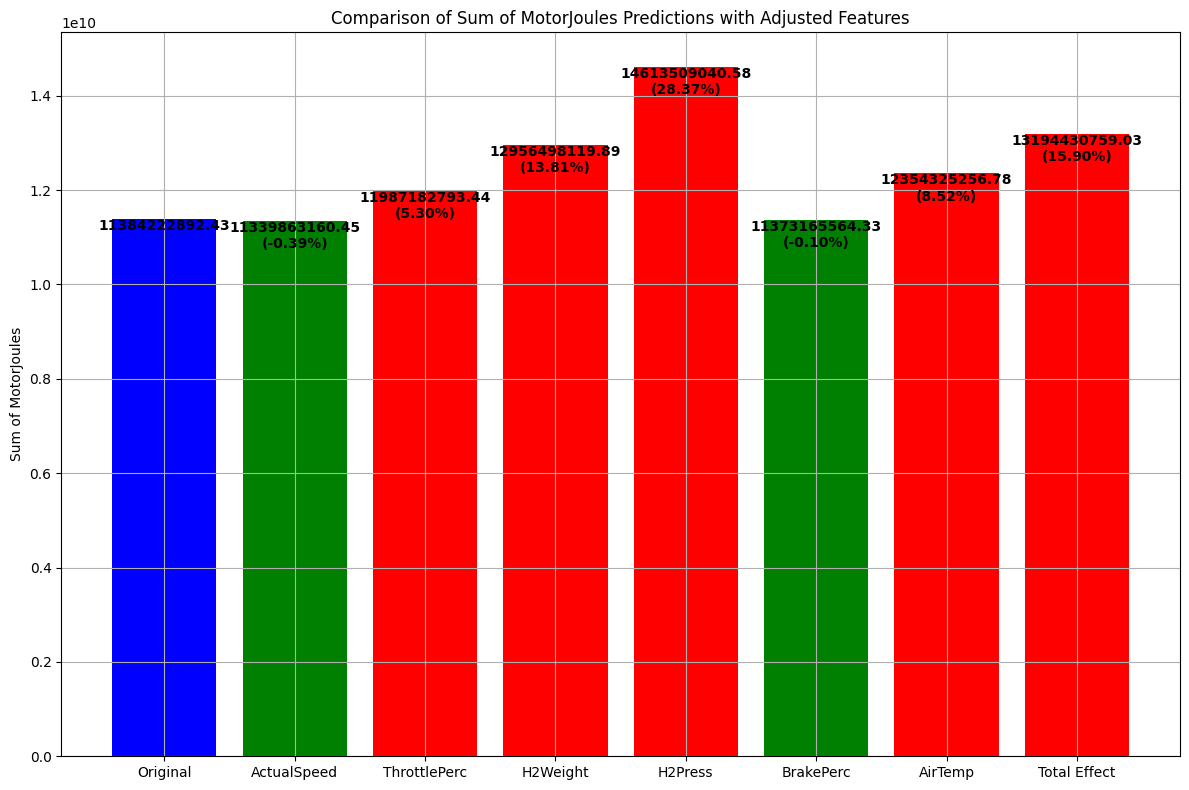

Original Sum of MotorJoules: 11384222892.43
Adjusted Sum of MotorJoules with 10% ActualSpeed: 11339863160.45
Adjusted Sum of MotorJoules with 10% ThrottlePerc: 11987182793.44
Adjusted Sum of MotorJoules with 10% H2Weight: 12956498119.89
Adjusted Sum of MotorJoules with 10% H2Press: 14613509040.58
Adjusted Sum of MotorJoules with 10% BrakePerc: 11373165564.33
Adjusted Sum of MotorJoules with 10% AirTemp: 12354325256.78
Total Adjusted Sum of MotorJoules: 13194430759.03
Change in Kg of Hydrogen based on Operational Characteristics: -27.15 kg


In [ ]:
import numpy as np
import pandas as pd
import joblib  # For loading models
import matplotlib.pyplot as plt

# Load the saved model, scaler, and polynomial transformer
model = joblib.load('polynomial_regression_model.pkl')
scaler = joblib.load('scaler.pkl')
poly_transformer = joblib.load('poly_transformer.pkl')

# Assuming 'df1' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Function to apply the model to filtered data
def apply_model_to_filtered_data(df, start_date, end_date):
    # Filter the dataset based on the specified date range
    filtered_df = filter_by_date(df, start_date, end_date)

    # Use all columns except 'datetime' and 'MotorJoules' as features
    features = ['ActualSpeed', 'NetWeight', 'SpeedChange', 'StopOnOff', 
                'ThrottlePerc', 'CompOnOff', 'FC2Current', 'FC3Current', 
                'MotorTemp', 'FC1AirFlow', 'FC2AirFlow', 'FC1Cool', 
                'FC2Cool', 'TotalDistance', 'CompPower', 'FC3Volt', 
                'FC2Volt', 'BatMinV', 'HVACDraw', 'H2Weight', 
                'H2Press', 'BrakePerc', 'BatSOC', 'H2Temp', 
                'AirTemp', 'H2Perc']

    # Drop the 'datetime' and 'MotorJoules' columns as they are not used for prediction
    new_data = filtered_df.drop(columns=['datetime', 'MotorJoules'])

    # Ensure the new data has the correct feature columns
    missing_features = set(features) - set(new_data.columns)
    if missing_features:
        raise ValueError(f"New data is missing the following required features: {missing_features}")

    # Reorder new_data columns to match the expected order
    new_data = new_data[features]

    # Generate polynomial features using the previously fitted polynomial transformer
    new_data_poly = poly_transformer.transform(new_data)  # Transform new data to polynomial features

    # Standardize the polynomial features using the previously fitted scaler
    new_data_scaled = scaler.transform(new_data_poly)  # Scale the polynomial features

    # Make predictions on the new data
    new_predictions = model.predict(new_data_scaled)

    return new_predictions, new_data

# Function to adjust a feature by a percentage
def adjust_feature(df, feature, percentage):
    adjusted_df = df.copy()
    adjusted_df[feature] *= (1 + percentage / 100.0)
    return adjusted_df

# Specify the date range for filtering
start_date = '2022-08-01'  # Change as needed
end_date = '2022-10-01'    # Change as needed

# Apply the model to the original filtered data
original_predictions, original_data = apply_model_to_filtered_data(df1, start_date, end_date)

# Feature adjustments in percentage
adjustment_percentages = {
    'ActualSpeed': 10,   # Example: increase by 10%
    'ThrottlePerc': 10,  # Example: increase by 10%
    'H2Weight': 10,      # Example: increase by 10%
    'H2Press': 10,       # Example: increase by 10%
    'BrakePerc': 10,     # Example: increase by 10%
    'AirTemp': 10        # Example: increase by 10%
}

# Store the sums of predictions for each adjusted feature
adjusted_sums = {}

# Apply adjustments to each feature and predict
for feature, percentage in adjustment_percentages.items():
    adjusted_data = adjust_feature(original_data, feature, percentage)
    adjusted_data_poly = poly_transformer.transform(adjusted_data)
    adjusted_data_scaled = scaler.transform(adjusted_data_poly)
    adjusted_predictions = model.predict(adjusted_data_scaled)
    adjusted_sum = np.sum(adjusted_predictions)
    adjusted_sums[feature] = adjusted_sum

# Sum of original predictions
original_sum = np.sum(original_predictions)

# Calculate total effect of all adjustments (sequentially applying all adjustments)
total_adjusted_data = original_data.copy()
for feature, percentage in adjustment_percentages.items():
    total_adjusted_data = adjust_feature(total_adjusted_data, feature, percentage)

total_adjusted_data_poly = poly_transformer.transform(total_adjusted_data)
total_adjusted_data_scaled = scaler.transform(total_adjusted_data_poly)
total_adjusted_predictions = model.predict(total_adjusted_data_scaled)
total_adjusted_sum = np.sum(total_adjusted_predictions)

# Determine colors for individual feature bars based on the rule (green if lower, red if higher)
colors = []
for feature in adjustment_percentages:
    if adjusted_sums[feature] < original_sum:
        colors.append('green')
    else:
        colors.append('red')

# Add the total effect bar color
total_color = 'green' if total_adjusted_sum < original_sum else 'red'

# Plot the bar plot
plt.figure(figsize=(12, 8))

# Original and individual feature adjustments
bars = plt.bar(
    ['Original'] + list(adjusted_sums.keys()) + ['Total Effect'],
    [original_sum] + list(adjusted_sums.values()) + [total_adjusted_sum],
    color=['blue'] + colors + [total_color]
)

# Add percentage difference text to bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    if i == 0:  # Original bar
        text = f'{yval:.2f}'
    else:
        difference = ((yval - original_sum) / original_sum) * 100
        text = f'{yval:.2f}\n({difference:.2f}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, yval, text, ha='center', va='bottom' if yval < 0 else 'top', fontsize=10, fontweight='bold')

# Add labels and title
plt.ylabel('Sum of MotorJoules')
plt.title('Comparison of Sum of MotorJoules Predictions with Adjusted Features')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Print the sums for verification
print(f"Original Sum of MotorJoules: {original_sum:.2f}")
for feature, adjusted_sum in adjusted_sums.items():
    print(f"Adjusted Sum of MotorJoules with {adjustment_percentages[feature]}% {feature}: {adjusted_sum:.2f}")

print(f"Total Adjusted Sum of MotorJoules: {total_adjusted_sum:.2f}")

# Calculate and print the change in kilograms of hydrogen
change_in_hydrogen_kg = (original_sum - total_adjusted_sum) /(66670 * 1000) # 1 J / 66670 J/g = 0.000015 grams
print(f"Change in Kg of Hydrogen based on Operational Characteristics: {change_in_hydrogen_kg:.2f} kg")


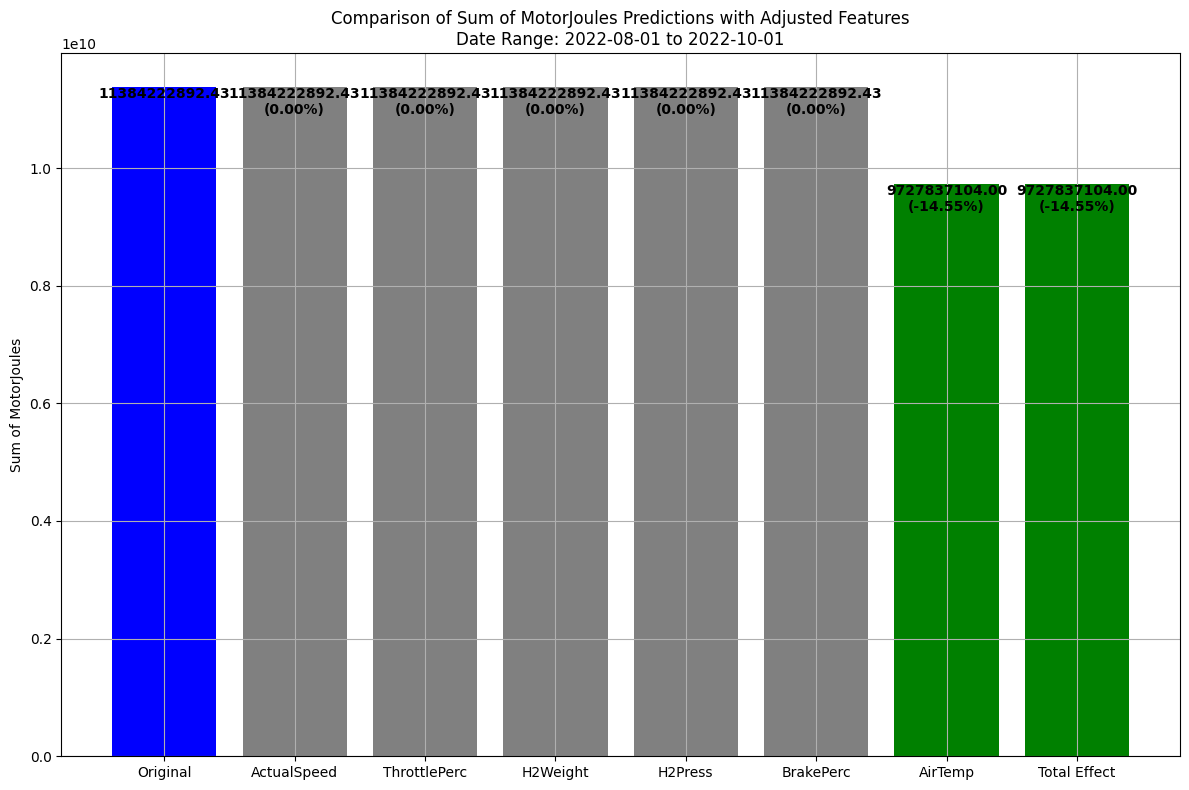

Original Sum of MotorJoules: 11384222892.43
Adjusted Sum of MotorJoules with 0% ActualSpeed: 11384222892.43
Adjusted Sum of MotorJoules with 0% ThrottlePerc: 11384222892.43
Adjusted Sum of MotorJoules with 0% H2Weight: 11384222892.43
Adjusted Sum of MotorJoules with 0% H2Press: 11384222892.43
Adjusted Sum of MotorJoules with 0% BrakePerc: 11384222892.43
Adjusted Sum of MotorJoules with -20% AirTemp: 9727837104.00
Total Adjusted Sum of MotorJoules: 9727837104.00
Change in Kg of Hydrogen based on Operational Characteristics: 1656385.79 kg


: 

In [ ]:
import numpy as np
import pandas as pd
import joblib  # For loading models
import matplotlib.pyplot as plt

# Load the saved model, scaler, and polynomial transformer
model = joblib.load('polynomial_regression_model.pkl')
scaler = joblib.load('scaler.pkl')
poly_transformer = joblib.load('poly_transformer.pkl')

# Assuming 'df1' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Function to apply the model to filtered data
def apply_model_to_filtered_data(df, start_date, end_date):
    # Filter the dataset based on the specified date range
    filtered_df = filter_by_date(df, start_date, end_date)

    # Use all columns except 'datetime' and 'MotorJoules' as features
    features = ['ActualSpeed', 'NetWeight', 'SpeedChange', 'StopOnOff', 
                'ThrottlePerc', 'CompOnOff', 'FC2Current', 'FC3Current', 
                'MotorTemp', 'FC1AirFlow', 'FC2AirFlow', 'FC1Cool', 
                'FC2Cool', 'TotalDistance', 'CompPower', 'FC3Volt', 
                'FC2Volt', 'BatMinV', 'HVACDraw', 'H2Weight', 
                'H2Press', 'BrakePerc', 'BatSOC', 'H2Temp', 
                'AirTemp', 'H2Perc']

    # Drop the 'datetime' and 'MotorJoules' columns as they are not used for prediction
    new_data = filtered_df.drop(columns=['datetime', 'MotorJoules'])

    # Ensure the new data has the correct feature columns
    missing_features = set(features) - set(new_data.columns)
    if missing_features:
        raise ValueError(f"New data is missing the following required features: {missing_features}")

    # Reorder new_data columns to match the expected order
    new_data = new_data[features]

    # Generate polynomial features using the previously fitted polynomial transformer
    new_data_poly = poly_transformer.transform(new_data)  # Transform new data to polynomial features

    # Standardize the polynomial features using the previously fitted scaler
    new_data_scaled = scaler.transform(new_data_poly)  # Scale the polynomial features

    # Make predictions on the new data
    new_predictions = model.predict(new_data_scaled)

    return new_predictions, new_data

# Function to adjust a feature by a percentage
def adjust_feature(df, feature, percentage):
    adjusted_df = df.copy()
    adjusted_df[feature] *= (1 + percentage / 100.0)
    return adjusted_df

# Specify the date range for filtering
start_date = '2022-08-01'  # Change as needed
end_date = '2022-10-01'    # Change as needed

# Apply the model to the original filtered data
original_predictions, original_data = apply_model_to_filtered_data(df1, start_date, end_date)

# Feature adjustments in percentage
adjustment_percentages = {
    'ActualSpeed': 0,   # Example: increase by 10%
    'ThrottlePerc': 0,  # Example: increase by 10%
    'H2Weight': 0,      # Example: increase by 10%
    'H2Press': 0,       # Example: increase by 10%
    'BrakePerc': 0,     # Example: increase by 10%
    'AirTemp': -20        # Example: increase by 10%
}

# Store the sums of predictions for each adjusted feature
adjusted_sums = {}

# Apply adjustments to each feature and predict
for feature, percentage in adjustment_percentages.items():
    adjusted_data = adjust_feature(original_data, feature, percentage)
    adjusted_data_poly = poly_transformer.transform(adjusted_data)
    adjusted_data_scaled = scaler.transform(adjusted_data_poly)
    adjusted_predictions = model.predict(adjusted_data_scaled)
    adjusted_sum = np.sum(adjusted_predictions)
    adjusted_sums[feature] = adjusted_sum

# Sum of original predictions
original_sum = np.sum(original_predictions)

# Calculate total effect of all adjustments (sequentially applying all adjustments)
total_adjusted_data = original_data.copy()
for feature, percentage in adjustment_percentages.items():
    total_adjusted_data = adjust_feature(total_adjusted_data, feature, percentage)

total_adjusted_data_poly = poly_transformer.transform(total_adjusted_data)
total_adjusted_data_scaled = scaler.transform(total_adjusted_data_poly)
total_adjusted_predictions = model.predict(total_adjusted_data_scaled)
total_adjusted_sum = np.sum(total_adjusted_predictions)

# Determine colors for individual feature bars based on the rule (green if lower, red if higher)
colors = []
for feature in adjustment_percentages:
    if adjusted_sums[feature] < original_sum:
        colors.append('green')
    elif adjusted_sums[feature] > original_sum:
        colors.append('red')
    else:
        colors.append('grey')

# Add the total effect bar color
total_color = 'green' if total_adjusted_sum < original_sum else 'red' if total_adjusted_sum > original_sum else 'grey'

# Plot the bar plot
plt.figure(figsize=(12, 8))

# Original and individual feature adjustments
bars = plt.bar(
    ['Original'] + list(adjusted_sums.keys()) + ['Total Effect'],
    [original_sum] + list(adjusted_sums.values()) + [total_adjusted_sum],
    color=['blue'] + colors + [total_color]
)

# Add percentage difference text to bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    if i == 0:  # Original bar
        text = f'{yval:.2f}'
    else:
        difference = ((yval - original_sum) / original_sum) * 100
        text = f'{yval:.2f}\n({difference:.2f}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, yval, text, ha='center', va='bottom' if yval < 0 else 'top', fontsize=10, fontweight='bold')

# Add labels and title
plt.ylabel('Sum of MotorJoules')
plt.title(f'Comparison of Sum of MotorJoules Predictions with Adjusted Features\nDate Range: {start_date} to {end_date}')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Print the sums for verification
print(f"Original Sum of MotorJoules: {original_sum:.2f}")
for feature, adjusted_sum in adjusted_sums.items():
    print(f"Adjusted Sum of MotorJoules with {adjustment_percentages[feature]}% {feature}: {adjusted_sum:.2f}")

print(f"Total Adjusted Sum of MotorJoules: {total_adjusted_sum:.2f}")

# Calculate and print the change in kilograms of hydrogen
change_in_hydrogen_kg = (original_sum - total_adjusted_sum) / 1000
print(f"Change in Kg of Hydrogen based on Operational Characteristics: {change_in_hydrogen_kg:.2f} kg")

